## Support Vector Machine

- Pros: 
    - relies on a few support vectors
        - Insentivity to outliers.
        - Takes little memory
        - Prediction phase very fast
        - Works well with data with lots of features
    - Powerfull when it is combined with kernels.
- Cons:
    - Hard to scale to dataset with lots of samples
    - Results strongly deponds on softening parameter C -> Need cross-validation search
    - Results do not have a direct probabilistic interpretation (discriminative vs generative model)
    
-> Use SVM when other simpler, faster methods(e.g. Naive Bayes) are insufficient

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

- **Naive Bayes Classifier** relies on *Generative model* -> Samples, for a given label/class, follow a given distribution
- **SVM**(classifier) relies on a *Discriminative model* -> Find a line/curve/manifold that divides the classes from each other

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

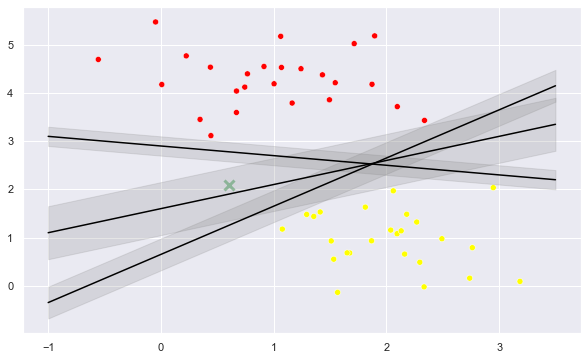

In [4]:
# Motivation

from sklearn.datasets.samples_generator import make_blobs
# X has shape: (50, 2)
# y has shape(50,)
X, y = make_blobs(n_samples=50,
                  centers = 2,
                  random_state=0,
                  cluster_std=0.60)
fig, ax = plt.subplots(figsize = (10, 6))

sns.scatterplot(X[:, 0], X[:, 1], c=y, cmap='autumn', ax=ax)

# Linear Discriminative Classifier -> Draw a straight line between the 2 set of data. Which line to choose ?

x_test = np.linspace(-1, 3.5)
# Draw a arbitrary point
sns.scatterplot([0.6], [2.1], marker='x', color = 'g', s=100, linewidth=3, alpha = 0.6, ax=ax)

# Draw 3 different lines between the datasets
# SVM: Maximizing the "margin"
# Draw around each line-candidate a margin of some width up to the nearest point
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    y_test = m*x_test+b
    sns.lineplot(x_test, y_test, color='black', ax=ax)
    ax.fill_between(x_test, y_test-d, y_test+d,
                    color = 'gray',
                    alpha=0.2)
    
# The line that maximizes this margin is the one we well choose as the optimal model

x shape:  (30,)  // y shape:  (30,)
X shape:  (30, 30)  // Y shape:  (30, 30)
XY shape:  (900, 2)


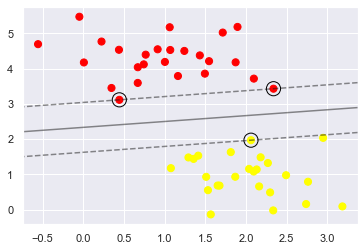

In [5]:
# Linear SVM module
from sklearn.svm import SVC # "Support Vector Classifier"
model = SVC(kernel = 'linear',
            C=1E10
           )
model.fit(X, y)

# Method to visualize SVC decision function
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() # Get the current axis or create one if necessary
    # Get the axis limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
        
    # Create grid to evaluate the model for the contour plot
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    print("x shape: ", x.shape, " // y shape: ", y.shape)
    X, Y = np.meshgrid(x, y)
    print("X shape: ", X.shape, " // Y shape: ", Y.shape)
    # Reshape the grid to vectorize operations
    XY = np.vstack([X.ravel(), Y.ravel()]).T
    print("XY shape: ", XY.shape)
    # Compute the SVM decision function on the entire grid, and reshape to the grid shape
    P = model.decision_function(XY).reshape(X.shape) # Distance of the sample X to the separation hyperplane
    
    # Plot the decision function and its lower + upper limite
    ax.contour(X, Y, # Grid
               P, # f(Grid) // 0 -> decision line // -1 -> lower limit // 1 -> upper limit
               colors = 'k',
               levels = [-1, 0, 1],
               alpha = 0.5,
               linestyles = ['--', '-', '--']
              )
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], # X-cordonate of the limit datapoints
                   model.support_vectors_[:, 1], # Y-cordonate of the limit datapoints
                   s=200,
                   linewidth=1,
                   facecolors='none',
                   edgecolors='black',
                   )

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, ax)

# The black circled datapoints are called "support vector". Only the position of the SV matters !
# -> Insentive to outliers

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x shape:  (30,)  // y shape:  (30,)
X shape:  (30, 30)  // Y shape:  (30, 30)
XY shape:  (900, 2)


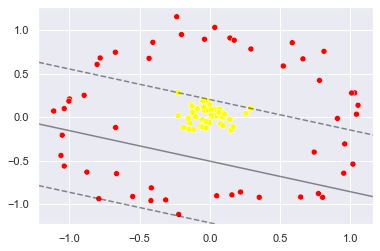

In [6]:
# Linear Kernel SVM limmit

# In notebook 5. we used a version of kernels: polynomial and Gaussian "basis functions"
# which enable us to fit non-linear relationship. Similar idea in SVM models.

# Motivation:

from sklearn.datasets.samples_generator import make_circles
# Make a large circle (label = 1) and smaller circle (label = 0)
X, y = make_circles(100, # Number of points generated
                    factor=0.1, # Scale factor between inner and outer circle
                    noise = 0.1 # Standard deviation of Gaussian noise
                   )

model = SVC(kernel='linear')
model.fit(X, y)

# Plot the dataset
sns.scatterplot(X[:, 0], X[:, 1], c=y, cmap='autumn')
# Use a linear SVM for this dataset
plot_svc_decision_function(model, plot_support=False)

# Solution: Project the data to higher dimension such that a linear separator would be sufficient

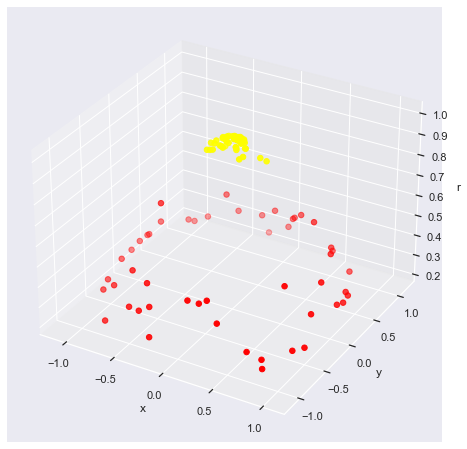

In [7]:
# Radial basis function: extra data dimension
# (Distance from center could be an valuable feature)
r = np.exp(-(X ** 2).sum(1))

# Visualize this new extra data dimension
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=None, y=None):
    fig = plt.figure(figsize=(12,8))
    ax = plt.subplot(projection='3d') # Add a subplot to the current figure, return subclass as Axes
    ax.scatter3D(X[:, 0], # X
                 X[:, 1], # Y
                 r, # Z
                 c=y, s=30, cmap='autumn')
    #ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
plot_3D(elev=-90, azim=-180, X=X, y=y)

# With this new feature, the data becomes linearly separable ! Draw a separate plane at r = 0.6

# But we were lucky because our radial basis function is centered in the right location (0,0),
# in general data is not center in (0.0). How to find the best basis function ?

# Solution: 
# Compute a basis function centered at EVERY points in the dataset.
# This type of basis function transformation is known as a kernel transformation
# Warning: N samples -> N projections , computationaly expensive

/Users/nicolas/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


x shape:  (30,)  // y shape:  (30,)
X shape:  (30, 30)  // Y shape:  (30, 30)
XY shape:  (900, 2)


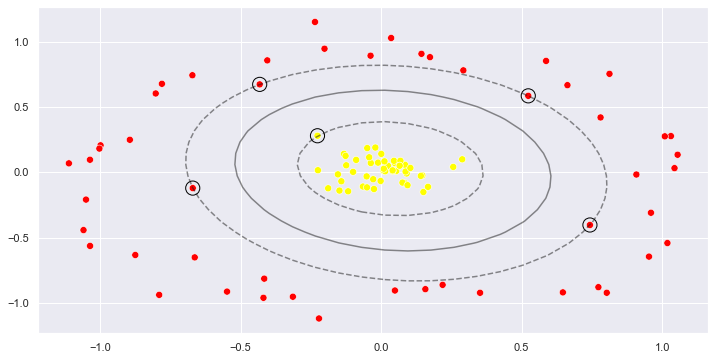

In [19]:
## Kernelized SVM

# To apply a kernel transformation, just need to change the "kernel" parameter of SVC object

model = SVC(kernel="rbf", # Radial Basis Function kernel
            C=1E6)
model.fit(X, y)

fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)


# Problem: What if the data has some amount of overlap ?

/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarnin

x shape:  (30,)  // y shape:  (30,)
X shape:  (30, 30)  // Y shape:  (30, 30)
XY shape:  (900, 2)
x shape:  (30,)  // y shape:  (30,)
X shape:  (30, 30)  // Y shape:  (30, 30)
XY shape:  (900, 2)
x shape:  (30,)  // y shape:  (30,)
X shape:  (30, 30)  // Y shape:  (30, 30)
XY shape:  (900, 2)


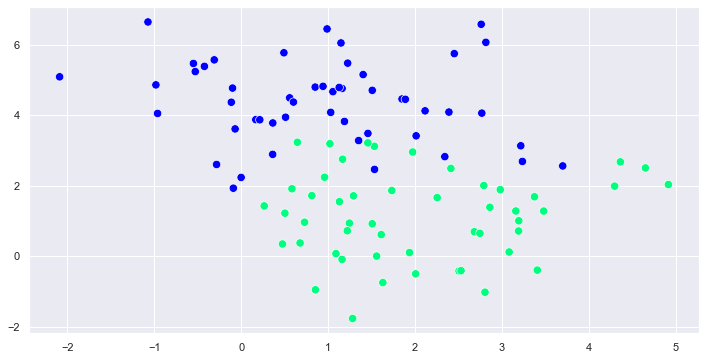

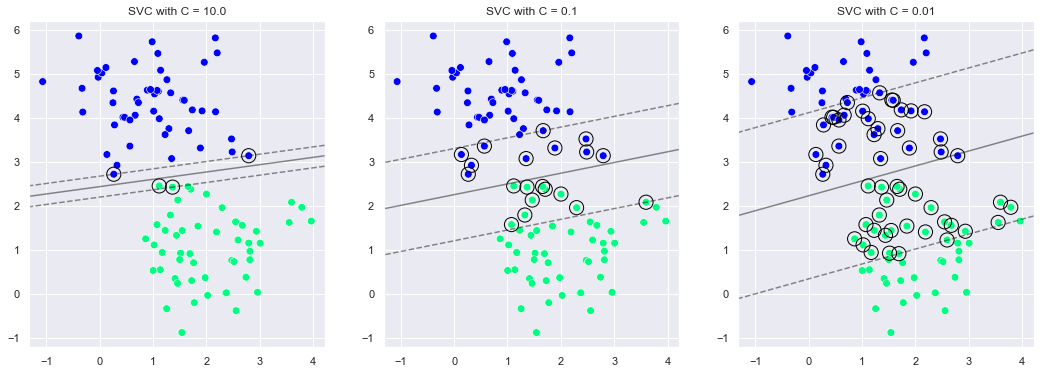

In [34]:
## Softening Margin

X, y = make_blobs(n_samples=100,
                  centers = 2,
                  random_state=0,
                  cluster_std=1.2)

fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(X[:, 0],
                X[:, 1],
                c=y,
                s=70,
                cmap='winter',
                ax=ax)

# Allow some of the datapoints to move inside the margin if that allows a better fit
# The "hardness" of the margin is controlled by the parameter "C"
# If C >> 0 then C is hard, datapoints cannot lie in it

# Example:

X, y = make_blobs(n_samples=100,
                  centers = 2,
                  random_state=0,
                  cluster_std=0.8)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for axi, C in zip(ax, [10.0, 0.1, 0.01]):
    model = SVC(kernel='linear',
                C=C).fit(X, y)
    sns.scatterplot(X[:, 0], X[:, 1], c=y, s=60, cmap="winter", ax=axi)
    plot_svc_decision_function(model, ax=axi)
    axi.set_title(f"SVC with C = {C}")

# -> To find the best value of C, use cross-validation/grid search

Target names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
Images shape: (1348, 62, 47)


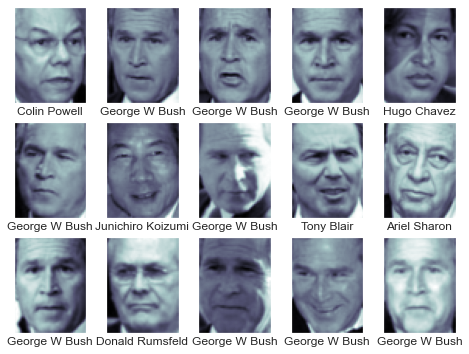

In [42]:
# Example: Face Recognition (Image classification)

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(f"Target names: {faces.target_names}")
print(f"Images shape: {faces.images.shape}")

fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axe in enumerate(ax.flat):
    axe.imshow(faces.images[i], cmap='bone')
    axe.set(xticks=[],
            yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [64]:
# Each pixel is 62x47 ~3'000 pixels. Let's preprocess the images with PCA the reducde the dimension to only 150.
# 3'000 dimensions -> 150 dimensions

# Create our pipeline (PCA -> SVC)
from sklearn.svm import SVC
from sklearn.decomposition import PCA # PCA using approx. Singular Value Decomposition of the data
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,
          svd_solver='randomized', # If input data is large, the more efficient method is 'randomized'
          whiten=True, # Ensure uncorrelated outputs
          random_state=42
          )
svc = SVC(kernel='rbf',
          class_weight="balanced", # Uses the target values to automatically adjust the C value. 
                                  # The more frequence label i is, the lower C is, the more softner the margin is
         )
model = make_pipeline(pca,
                      svc)

# Split dataset into training and test set
from sklearn.model_selection import train_test_split
# By default 75%/25% split
X_train, X_test, y_train, y_test = train_test_split(faces.data, # X is (1'348 x 2914)
                                                    faces.target, # y is (1'348)
                                                    random_state=42
                                                   )
# Grid search to find the best C and gamma value of the model
# C = Margin hardness
# gamma = size of the radial basis function kernel (kernel coefficient)
from sklearn.model_selection import GridSearchCV

# Define the parameter to play with
params_grid = {"svc__C": [1, 5, 10, 50],
               'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, # Model to test
                    params_grid # Combination of model paramter to test
                    )
# Fit the grid to data
%time grid.fit(X_train, y_train) # Size of training set is fixed -> Play with model complexity only

# Ask for the best paramters
print("Best params for our data: ", grid.best_params_)




/Users/nicolas/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 44.3 s, sys: 4.52 s, total: 48.9 s
Wall time: 26 s
Best params for our data:  {'svc__C': 10, 'svc__gamma': 0.001}


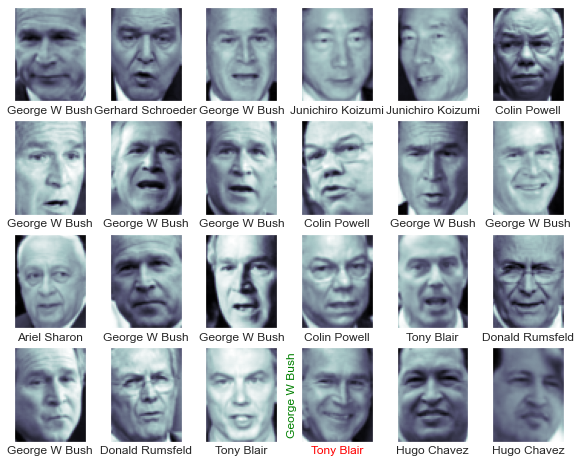

In [75]:
# Get the best model from the grid & make some predictions
model = grid.best_estimator_
y_model = model.predict(X_test)

fig, axes = plt.subplots(4, 6, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(62, 47), # Reshape to the original picture size
              cmap='bone')
    ax.set(xticks=[],
           yticks=[],
           xlabel=faces.target_names[y_model[i]])
    if y_model[i] != y_test[i]:
        ax.xaxis.label.set_color('red')
        ax.yaxis.label.set_text(faces.target_names[y_test[i]])
        ax.yaxis.label.set_color('green')

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



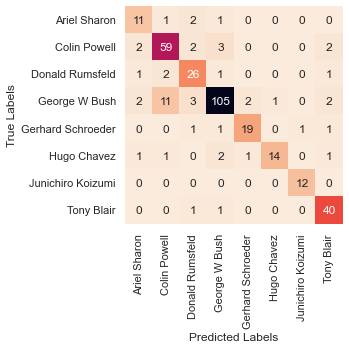

In [96]:
# Model performance
from sklearn.metrics import classification_report

# Get statistic label by label
# Precision = Vrais positive(nb samples correctly assigned to i) / Nb of positive (nb samples assinged to label i)
# Recall = Vrais positive (nb samples correctly assigned to i) / Nb of true (nb samples actually belongs to label i)
# F1 score = 2 * Precision*Recall/(Precision + Recall)

print(classification_report(y_test, y_model,
                            target_names=faces.target_names))

# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_model)
sns.heatmap(conf_matrix,
            square=True,
            annot=True,
            cbar = False,
            fmt='d', # String formatted code
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,
            cmap = sns.cm.rocket_r)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

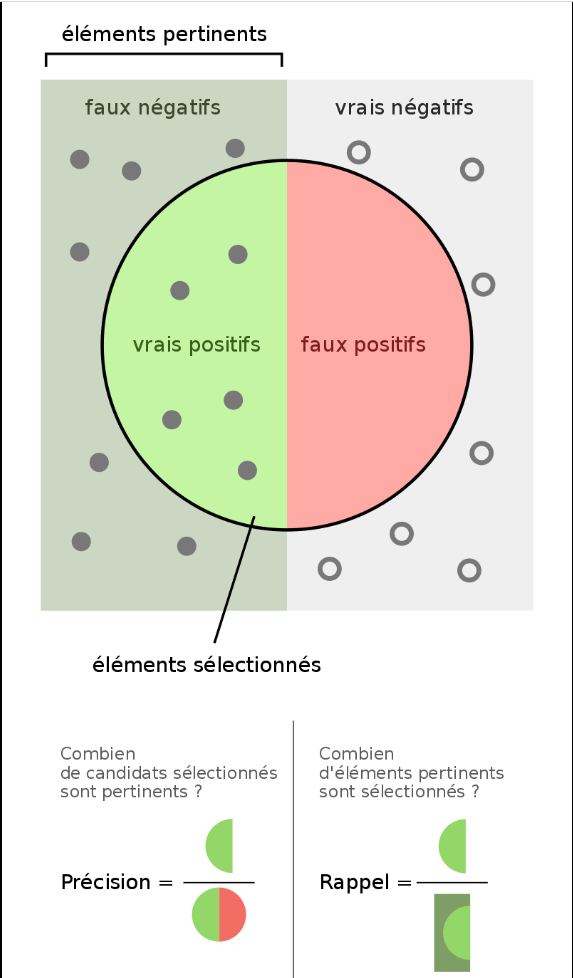

#### Concept Summary
- SVC: "Support Vector Classifier"
    - Discriminative model vs. Generative model
    - kernel transformation strategy: Compute a basis function for every points in the dataset. Turn fast linear methods into fast nonlinear methods
    - Soften Margin: Allow datapoints to move inside the margin if that allows a better fit
    
- Classification report:
    - Precision
    - Recall
    - F1 Score